In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode

In [2]:
# plotly config
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
# importing the dataset
df = pd.read_csv("./data/master.csv")
print(df.shape)
df.head()

(27820, 12)


country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

## Dealing with Missing Values

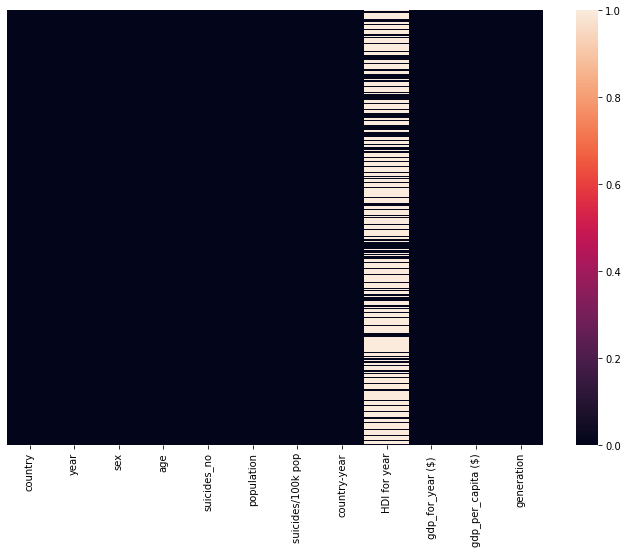

In [4]:
# Dropping HDI for year because it has too much missing values
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(),yticklabels=0)
plt.show()
df.drop(['HDI for year'],axis=1,inplace=True,)

## Deaths Per Year ( Country Comparison )

In [5]:
# data preparation and pre-processing
country_list = list(df['country'].drop_duplicates())
year_list = list(df['year'].drop_duplicates())
year_list.sort()
country = []
year = []
no_of_suicides = []
for countryname in country_list:
    for yearname in year_list:
        country.append(countryname)
        year.append(yearname)
        try:
            no_of_suicides.append(df.groupby(['country','year']).get_group((countryname,yearname))['suicides/100k pop'].sum())
        except:
            no_of_suicides.append(0)
            
# convertion to dataframe
df1 = pd.DataFrame({
    'Country':country,
    'Year':year,
    'Suicides per 100k':no_of_suicides
})

# plot
fig = px.scatter(df1,x='Country',y='Suicides per 100k',animation_frame='Year',size='Suicides per 100k',color='Country')
fig.update_layout(
    xaxis={
        'showticklabels':False,
        'showgrid':False
    },
    title='Suicides Each Year Per Country',
    yaxis_title='Number of Suicides'
)

In [7]:
# total number of suicides over the years
year_list.sort()
deaths_per_year = []
for yearname in year_list:
    deaths_per_year.append(df.groupby('year').get_group(yearname)['suicides_no'].sum())

df2 = pd.DataFrame({
    'year':year_list,
    'deaths':deaths_per_year
})

fig = go.Figure()
fig.add_trace(go.Scatter(x=df2['year'],y=df2['deaths'],marker={'color':'red'},mode='lines+markers',hovertext=df2['year'],hoverinfo='text'))
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Suicides',
    title='Suicides over the Years',
)

## Generations

In [8]:
generationlist = list(df['generation'].drop_duplicates())
generations = []
deaths = []
for generation in generationlist:
    generations.append(generation)
    deaths.append(df.groupby('generation').get_group(generation)['suicides_no'].sum())
df3 = pd.DataFrame({
    'generations':generations,
    'deaths':deaths
})
fig = px.pie(df3,values='deaths',names='generations')
fig.update_layout(
    title='Distribution of deaths over different generations'
)

## Role of Gender

In [9]:
malecount = df.groupby('sex').get_group('male')['suicides_no'].sum()
femalecount = df.groupby('sex').get_group('female')['suicides_no'].sum()
fig = px.bar(x=['Male','Female'],y=[malecount,femalecount],color=[malecount,femalecount])
fig.update_layout(
    title='Gender vs Suicides',
    xaxis_title='Gender',
    yaxis_title='Number of Suicides'
)

## Does GDP affect Suicide Rates

In [10]:
country_year_list = list(df['country-year'].drop_duplicates())
gdp = []
suicides = []
for countryyear in country_year_list:
    gdp.append(df[['country-year','gdp_per_capita ($)','suicides/100k pop']].groupby('country-year').get_group(countryyear)['gdp_per_capita ($)'].iloc[0])
    suicides.append(df[['country-year','gdp_per_capita ($)','suicides/100k pop']].groupby('country-year').get_group(countryyear)['suicides/100k pop'].sum())

df4 = pd.DataFrame({
    "gdp":gdp,
    "suicides":suicides
})
    

# plot
fig = px.scatter(df4,x='gdp',y='suicides')
fig.update_layout(
    title="GDP vs Suicide Rates",
    xaxis_title="Gdp",
    yaxis_title="Suicide rates"
)

## Which Country Has done the best job in reducing the suicide rate

In [12]:
country_deaths = []
for country in country_list:
    country_deaths.append(df.groupby('country').get_group(country)['suicides/100k pop'].mean())

df5 = pd.DataFrame({
    'country':country_list,
    'suicides':country_deaths
}).sort_values(by='suicides').head()
df5

country  suicides
76  Saint Kitts and Nevis  0.000000
27               Dominica  0.000000
45                Jamaica  0.521765
1     Antigua and Barbuda  0.552901
65                   Oman  0.736111

## Exporting the Datasets

In [13]:
df1.to_csv('./data/df1.csv')
df2.to_csv('./data/df2.csv')
df3.to_csv('./data/df3.csv')
df4.to_csv('./data/df4.csv')
df5.to_csv('./data/df5.csv')